## <p style='text-align: right;'> Last edited: 29 April 2022 </p>


# Introduction

The purpose of this project is to train a model by using one of the supervised machine learning algorithms and use the model to predict the score of the essay. The data set we are given includes many features. I have to select some features which are related to evaluating my scores in order to have an accurate model . After selecting the suitable features for the model, I normalise the data in order to have the same scale. After that, I use the Support Vector Machine to build my model. Besides that, I also use confusion matrix and quadratic weighted kappa to check for the accuracy and true agreement of my model. All in all, I use the model to predict the score of a new data set.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read CSV files

In [2]:
essay_features = pd.read_csv("Project 2 Files/FIT1043-Essay-Features.csv")

Checking the data, whether did I read the correct csv file.

In [3]:
essay_features.head(5)

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [4]:
essay_features.score.unique()

array([4, 3, 2, 1, 5, 6])

In [5]:
essay_features.shape

(1332, 19)

In [6]:
essay_features.dtypes

essayid                        int64
chars                          int64
words                          int64
commas                         int64
apostrophes                    int64
punctuations                   int64
avg_word_length              float64
sentences                      int64
questions                      int64
avg_word_sentence            float64
POS                          float64
POS/total_words              float64
prompt_words                   int64
prompt_words/total_words     float64
synonym_words                  int64
synonym_words/total_words    float64
unstemmed                      int64
stemmed                        int64
score                          int64
dtype: object

In [7]:
essay_features.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
count,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.00000,1332.000000,1332.000000,1332.000000,1332.000000
mean,905.27027,2101.745495,424.485736,14.667417,8.141141,0.47973,4.939762,19.704204,1.222973,23.884687,420.596542,0.989935,198.913664,0.469164,110.16967,0.263846,468.987988,455.507508,3.427177
std,526.68760,865.963750,171.873730,10.920781,6.124520,1.27168,0.231071,19.202731,1.847446,11.160020,170.985111,0.007308,82.729266,0.052466,43.96192,0.038870,159.447449,155.751220,0.774275
min,0.00000,169.000000,36.000000,0.000000,2.000000,0.00000,2.231322,0.000000,0.000000,1.084112,35.647059,0.924771,14.000000,0.288889,11.00000,0.027299,48.000000,50.000000,1.000000
25%,442.75000,1527.250000,310.000000,7.000000,4.000000,0.00000,4.791679,13.000000,0.000000,19.142857,305.406284,0.987758,144.000000,0.435709,81.00000,0.238423,361.000000,350.750000,3.000000
50%,914.50000,2029.500000,411.000000,13.000000,6.000000,0.00000,4.946059,18.000000,1.000000,22.030331,406.982869,0.991572,193.000000,0.465852,107.50000,0.262872,463.000000,448.000000,3.000000
75%,1369.75000,2613.500000,525.000000,21.000000,11.000000,0.00000,5.092938,24.000000,2.000000,26.048234,520.739458,0.994425,246.000000,0.500000,134.00000,0.288277,581.000000,561.250000,4.000000
max,1799.00000,6142.000000,1170.000000,72.000000,51.000000,26.00000,5.681429,642.000000,17.000000,303.000000,1158.984563,1.000000,669.000000,0.961207,355.00000,0.465517,750.000000,750.000000,6.000000


From the description of the data in the DataFrame of essay_features, I noticed that this data set has imbalanced data. The scores of 3 and 4 are the majority classes. This will cause the QWK has a lower score.

# 2. Supervised learning

## 2a) Explain supervised machine learning, the notion of labelled data, and the training and test datasets.

Supervised learning is a subset of machine learning and artificial intelligence. We train models with labelled data where the label is the target we are interested in predicting. In supervised learning, the machine learning model would simply use previous labelled data in order to predict the label of new data points. Examples of algorithms used for supervised learning are support vector machine, neural network, linear and logistics regression, random forest, and classification trees. In contrast, unsupervised learning is a machine learning approach that allows the model to explore information on its own. It mainly involves unlabelled data. 

The concept of labelled data is a technique for identifying raw data (pictures, text files, videos, etc.) and adding one or more relevant and useful tags to provide context so that machine learning models can learn from them and make accurate predictions. For example, a label might show a photo that contains a cat or dog. It is deemed that data that has been labelled is more difficult to obtain.

Before building the model, we have to split our data to training set and testing set. Training set the set of data which we use to train our model. We can evaluate our model based on testing set. Both of these data are not overlapping. This way allow us to measure how the model reacts to new observations.

## 2b) Separate the features and the label (Hint: the label, in this case, is the ‘score’)


In order to improve the accuracy of my model, I had to find the associated characteristics from the set of data and remove the irrelevant or less important features that did not contribute much to my target variable. There are mutliple feature selection techniques, which are univariate selection, feature importance and correlation matrix with heatmap (Raheel Shaikh, 2018). I am using univariate selection, correlation matrix and feature importance to identify which features are most related to the target variable.


## A) Univariate selection method

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = essay_features.iloc[:,0:18]  #independent columns
y = essay_features.iloc[:,-1]    #dependent,output column -> scores
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Fectures','Score']  
print(featureScores.nlargest(17,'Score'))  

                     Fectures          Score
1                       chars  223680.120590
10                        POS   40864.147356
2                       words   40816.302124
16                  unstemmed   35432.048223
17                    stemmed   34700.384107
12               prompt_words   18902.297903
14              synonym_words    7904.305721
3                      commas    3098.869246
0                     essayid    1699.755801
7                   sentences    1411.695719
4                 apostrophes     695.676229
8                   questions     408.594891
9           avg_word_sentence     130.078511
5                punctuations     122.427655
6             avg_word_length       1.568220
15  synonym_words/total_words       0.739756
13   prompt_words/total_words       0.055329


##### From the table above, we know that feactures (chars, POS, words, unstemmed, stemmed) have the strongest relationship with the output variable.

## B) Correlation matrix with heatmap

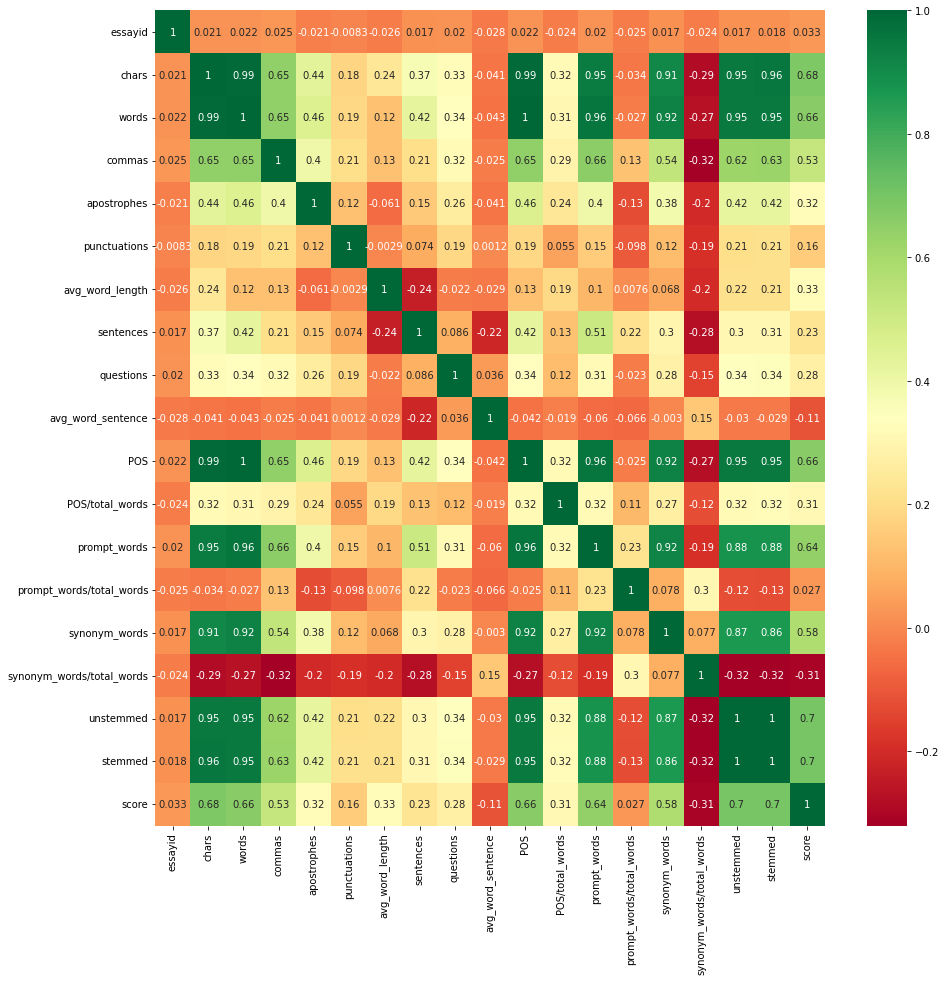

In [9]:
import seaborn as sns
X = essay_features.iloc[:,0:18]  
y = essay_features.iloc[:,-1]    
#get correlations of each features in dataset
corrmat = essay_features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(essay_features[top_corr_features].corr(),annot=True,cmap="RdYlGn")

##### From the heatmap above, we know that feactures (chars-0.68, POS-0.66, words-0.66, unstemmed-0.7, stemmed-0.7) are most related to the target variable.

## C) Feature importance method

[0.04312903 0.07786972 0.06519126 0.06092281 0.04460058 0.02581294
 0.05721847 0.04471127 0.03612724 0.04170541 0.07629335 0.04302531
 0.07304754 0.04290224 0.05408735 0.04550886 0.08296022 0.08488641]


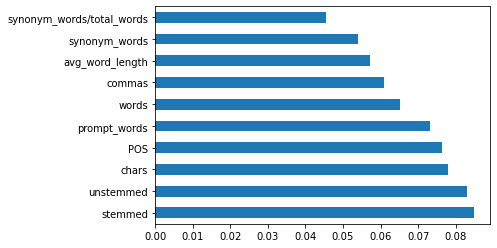

In [10]:
X = essay_features.iloc[:,0:18]  
y = essay_features.iloc[:,-1] 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

##### From the bar graph above, I can know that the higher the score more important or relevant is the feature towards my output variable.

## 2c)Use the sklearn.model_selection.train_test_split function to split your data for training and testing.

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = essay_features.iloc[:, [1,10,2,16,17]].values
y = essay_features.iloc[:, -1].values 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size = 0.20, random_state = 110 # the order of the row
)

#checking am I splitting correctly 
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))


1065 1065
267 267


### 80% is training data, 20% is testing data

In [14]:
X_train

array([[ 290.       ,   54.       ,   56.       ,   74.       ,
          73.       ],
       [2048.       ,  405.9901478,  409.       ,  467.       ,
         457.       ],
       [ 980.       ,  194.9896907,  196.       ,  237.       ,
         232.       ],
       ...,
       [2616.       ,  530.6541353,  536.       ,  602.       ,
         579.       ],
       [1458.       ,  286.3216783,  289.       ,  356.       ,
         346.       ],
       [2225.       ,  452.660767 ,  454.       ,  536.       ,
         517.       ]])

In [15]:
y

array([4, 4, 4, ..., 3, 3, 4])

# 3. Classification

## 3a. Explain the difference between binary and multi-class classification.

Classification classifies data into different groups. It is used to predict from which dataset the input data belongs. Binary classification is a process in which a given data is classified into two classes whereas multi-class classification involves predicting more than two classes. Examples of binary classification are true or false, yes or no, spam or not spam, fraud or not fraud and et cetera. Classes of multi-class classification are partitioned as mutually exclusive. Each of the data must belong to one class even if it’s an outlier. Examples of multi-class classification include face classification, text translation models and so on.

## 3b i) Describe what you understand from this need to normalise data (this is in your Week 7 laboratory).

Normalisation is needed when the range of our data varies widely. Data normalization
is one of the important part of prepossessing data. Real-world datasets frequently contain features with varied magnitudes, ranges, and units. Therefore, feature scaling is required for machine learning models to understand these features on the same scale. 

From our data(essay feature) we can see that the magnitude of char is up to thousands but some data is between 0 to 1. If I don't scale and normalise this data set, the result will be affected by this particular feature as it has large value.

The goal of normalization and scaling our data is to transform features to be on a similar scale. This improves the performance and training stability of the model (Chong, 2020).

## 3b ii) Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately.

In [16]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train) 
X_test = std_scaler.transform(X_test)

## 3c i) Describe SVM (in relation to Linear Regression).

Support Vector Machine(SVM) is one of the most widely used Supervised Learning techniques for Classification and Regression issues. SVM is a supervised machine learning algorithm used for both classification and regression.The goal of the SVM algorithm is to find a hyperplane in an N-dimensional space that categorises data points clearly.The dimension of the hyperplane depends upon the number of features. SVM is effective in high dimensional cases(Support Vector Machine Algorithm, 2021).SVM supports different kernel functions. It uses the kernel trick to find the best line separator. The most common kernels are rbf, poly or sigmoid, but we can also create our own kernel.

Linear regression analysis is a statistical technique for predicting the value of one variable based on the value of another. The dependent variable is the variable you wish to forecast. The independent variable is the one you're using to predict the value of the other variable.. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values(best fit line). 

SVM seeks to locate the "best" margin (distance between the line and the support vectors) that divides the classes, reducing the possibility of data error, however linear regression does not. Besides that, SVM works effectively with unstructured and semi-structured data, such as text and pictures, whereas logistic regression works with independent variables that have previously been defined.


## 3c ii) In SVM/SVR, there is something called the kernel. Explain what you understand from it.

A kernel aids in the search for a hyperplane in a higher-dimensional space without increasing the computational cost. When the size of the data grows, the computing cost usually grows with it. When we can't discover a separating hyperplane in one dimension and need to shift to a higher dimension, we need to raise the dimension. The benefit of using a kernel is that it allows us to go to greater dimensions and execute smooth computations(Sethi, 2020). Furthermore, kernels allow us to do stuff in infinite dimensions.

We can set the value of the kernel parameter in the SVM code. The kernel functions do all the complex calculations for us. We just have to use the appropriate kernel. There are kernels like RBF that work well with smaller data as well. However,RBF is a universal kernel, employing it on smaller datasets may result in overfitting. As a result, simpler kernels such as linear and polynomial are encouraged.(SVM Kernel Functions - 'Coz Your SVM Knowledge Is Incomplete without It, 2020). 


## 3c iii)Write the code to build the model using your training dataset.

In [17]:
from sklearn.svm import SVC # "Support vector classifier" 
from sklearn.metrics import confusion_matrix, accuracy_score

C and gamma values are chosen by using GridSearchCV

In [18]:
classifier = SVC(kernel='rbf', random_state=0,C= 10, gamma= 0.9)  
classifier.fit(X_train, y_train)


SVC(C=10, gamma=0.9, random_state=0)

In [19]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.6779026217228464

### I found that using GridSearchCV can help me to find the best kernel and parameters for my model by using SVM (SVM Hyperparameter Tuning Using GridSearchCV, 2020).

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C':[ 0.1, 1, 10],'kernel':['linear','rbf'],'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
grid = GridSearchCV(SVC(),param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'kernel': ['linear', 'rbf']})

In [22]:
print(grid.best_params_)
print(grid.score(X_test,y_test))

{'C': 10, 'gamma': 0.9, 'kernel': 'rbf'}
0.6779026217228464


From the result, I know that what are the best kernel and parameter for the SVM model.

## 3d i) Using the testing dataset you created in 2(c) above, conduct the prediction for the ‘score’ (label).

In [23]:
y_pred= classifier.predict(X_test)
y_pred

array([3, 4, 3, 4, 3, 5, 3, 3, 1, 4, 4, 4, 3, 3, 4, 3, 2, 4, 4, 2, 4, 3,
       4, 4, 3, 3, 4, 3, 2, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 2, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 1, 3, 3, 4, 2, 4, 4, 4, 4,
       4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 3, 4,
       4, 4, 3, 3, 3, 3, 4, 4, 4, 4, 1, 3, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4,
       3, 3, 2, 3, 4, 3, 3, 4, 4, 3, 2, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 4, 3, 4, 4, 2, 3, 4, 3, 4, 3, 3,
       3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 2, 4, 4, 4, 3, 3, 4, 4,
       3, 3, 4, 4, 4, 4, 4, 2, 3, 3, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 4, 4,
       3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4, 2,
       3, 4, 3, 4, 4, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 2, 3,
       4, 4, 4])

## 3d ii) Display the confusion matrix (it should look like a 6x6 matrix).

In [24]:
#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[ 2,  2,  2,  0,  0,  0],
       [ 1, 12, 10,  0,  0,  0],
       [ 0,  1, 85, 30,  0,  0],
       [ 0,  0, 28, 82,  1,  0],
       [ 0,  0,  1,  9,  0,  0],
       [ 0,  0,  0,  1,  0,  0]])

In [25]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6779026217228464


# Explaining the confusion matrix

The diagonal of the array represents the true positive(TP) value of each classes. As the matrix above, 2 is the TP of class 1. 12 is the TP of class 2. 85 is the TP value class 3. 82 is the TP value class 4. 80 is the TP value class 5. 0 is the TP value class 6. 

False positive of class 1 is the sum of the values in the corresponding column.

False negative of class 1 is the sum of the values in the corresponding row. 

True negative of class 1 is the sum of all rows and columns excluding the class's row and column. This applies to every class.

The confusion matrix above showed that there are no true positive value for class 5 and 6. The accuracy of the confusion matrix is 0.6779.

## 3d iii) Explain Quadratic Weighted Kappa (QWK). 

The quadratic weighted kappa, which evaluates the agreement between two ratings, is used to rate submissions. This statistic normally ranges from 0 (random agreement between raters) to 1 (complete agreement between raters).  The metric may fall below 0 if the raters have less agreement than would be predicted by chance. Between the expected/known and forecast scores, a quadratic weighted kappa is produced.The amount of agreement between an algorithm's predictions and true labels is referred to as QWK.


## 3d iv) Use the sklearn.metrics library to code and obtain the QWK score.

In [26]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, y_pred, weights="quadratic")

0.6544647809206877

## Explain the QWK score

This metric typically varies from 0 (random agreement) to 1 (complete agreement). In the event that there is less agreement than expected by chance, the metric may go below 0 i.e. it may become negative.

So, we can present it in tabular form as below - (prashant111, 2020)

-1 : Complete disagreement

0 : Agreement by chance

0-0.2 ; Poor agreement

0.2-0.4 : Moderate agreement

0.4-0.6 : Good agreement

0.6-0.8 : Very good agreement

0.8-1 : Perfect agreement

1 : Complete agreement

Our QWK value has found to be 0.6545.

It means that the actual and predicted values have very good agreement.


## 4a. Read the ‘FIT1043-Essay-Features-Submission.csv’ file and use the model you built earlier to predict the ‘score’.

## 4b. Unlike the previous section, you have a testing (also sometimes referred to as the validation) dataset where you know the ‘score’ and will be able to test for the accuracy. In this part, you don’t have a ‘score’ and you have to predict it and submit it to the competition site.

In [27]:
essay_features_submission = pd.read_csv("Project 2 Files/FIT1043-Essay-Features-Submission.csv")

In [28]:
essay_features_submission.head()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
0,1623,4332,900,28,13,0,4.813333,39,1,23.076923,893.988852,0.993321,392,0.435556,196,0.217778,750,750
1,1143,1465,280,11,3,1,5.232143,14,3,20.000000,278.321343,0.994005,131,0.467857,51,0.182143,339,316
2,660,1696,325,17,2,0,5.218462,19,1,17.105263,321.316770,0.988667,178,0.547692,92,0.283077,352,337
3,1596,2640,555,20,17,0,4.756757,28,0,19.821429,551.989150,0.994575,228,0.410811,107,0.192793,632,605
4,846,2844,596,33,4,1,4.771812,24,9,24.833333,593.658810,0.996072,279,0.468121,138,0.231544,626,607


In [29]:
essay_features_submission.describe()

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,866.246231,2151.723618,432.904523,15.055276,8.437186,0.422111,4.961988,20.201005,1.311558,23.427486,429.080957,0.990736,203.597990,0.473099,112.236181,0.262899,469.603015,455.899497
std,495.767821,892.834324,178.346405,11.313350,6.431836,0.900456,0.208963,9.997464,1.840459,14.853168,177.156625,0.006472,83.751431,0.050144,46.160781,0.039271,157.915967,154.569425
min,18.000000,236.000000,50.000000,0.000000,2.000000,0.000000,4.342593,2.000000,0.000000,11.349398,50.000000,0.959283,22.000000,0.305556,11.000000,0.175911,72.000000,74.000000
25%,477.000000,1534.000000,311.500000,8.000000,3.500000,0.000000,4.830455,13.500000,0.000000,18.791126,308.161248,0.988327,145.500000,0.442804,82.500000,0.232916,366.000000,357.000000
50%,862.000000,2079.000000,417.000000,12.000000,6.000000,0.000000,4.971609,19.000000,1.000000,21.428571,412.985507,0.992126,198.000000,0.468121,109.000000,0.266010,461.000000,448.000000
75%,1255.000000,2637.000000,524.500000,20.000000,13.000000,0.000000,5.081581,24.000000,2.000000,25.400000,520.988513,0.995141,241.000000,0.508232,136.000000,0.289107,576.000000,548.000000
max,1769.000000,5066.000000,1061.000000,67.000000,37.000000,5.000000,5.541401,83.000000,10.000000,216.500000,1052.320719,1.000000,582.000000,0.619247,336.000000,0.370293,750.000000,750.000000


We have 199 essayid in this data frame.

In [30]:
essay_features_submission_independent_var = essay_features_submission.iloc[:, [1,10,2,16,17]].values

In [31]:
predict_data_set = std_scaler.transform(essay_features_submission_independent_var)

In [32]:
predicted_output = classifier.predict(predict_data_set)
predicted_output

array([4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 3, 3, 4, 3, 4, 4, 3, 3, 3, 4, 3, 3,
       1, 3, 3, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 4, 2, 3, 3, 4, 3, 4,
       4, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 4, 2, 4, 4,
       2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 2, 4, 3, 4, 3, 3, 4, 4,
       5, 3, 4, 4, 4, 3, 3, 4, 2, 3, 4, 4, 4, 3, 2, 4, 3, 4, 4, 2, 4, 4,
       2, 3, 4, 4, 3, 4, 1, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3,
       4, 3, 3, 3, 4, 4, 4, 3, 2, 3, 4, 4, 3, 3, 1, 4, 3, 4, 3, 3, 4, 4,
       4, 3, 3, 5, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 4, 4, 3,
       3])

In [33]:
predicted_output = pd.DataFrame(predicted_output)
predicted_output

,0
0,4
1,3
2,3
3,4
4,4
...,...
194,3
195,4
196,4
197,3


In [34]:
file_to_submit = pd.read_csv("Project 2 Files/YourID-YourName-1.csv")
file_to_submit.columns

Index(['essayid', 'score'], dtype='object')

In [35]:
predicted_output.insert(0,'essayid',file_to_submit["essayid"])

In [36]:
predicted_output.rename(columns={0 : 'score'},inplace = True)

In [37]:
predicted_output.sample(5)

,essayid,score
182,507,4
22,977,4
123,506,3
143,1007,3
137,156,4


In [38]:
predicted_output.shape

(199, 2)

## 4c) Output your prediction to a CSV file

In [39]:
predicted_output.to_csv("32938586-Tee Zhi Hui-v21.csv",index=False) 

# Conclusion

In conclusion, the main objective of this report is to build a model which can predict the score of the essay based on certain features.

# References

1.Raheel Shaikh. (2018, October 28). Feature Selection Techniques in Machine Learning with Python. Medium; Towards Data Science. https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e 


2.Chong, J. (2020, December 30). What is Feature Scaling & Why is it Important in Machine Learning? Towards Data Science. https://towardsdatascience.com/what-is-feature-scaling-why-is-it-important-in-machine-learning-2854ae877048


3.Support Vector Machine Algorithm. (2021, January 20). GeeksforGeeks. https://www.geeksforgeeks.org/support-vector-machine-algorithm/


4.Sethi, A. (2020, March 27). Support Vector Regression In Machine Learning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/


5.SVM Kernel Functions - 'Coz your SVM knowledge is incomplete without it. (2020, March 13). TechVidvan. https://techvidvan.com/tutorials/svm-kernel-functions/


6.SVM Hyperparameter Tuning using GridSearchCV. (2020, March 10). Velocity Business Solutions Limited. https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/


7.prashant111. (2020, April 24). Simple Explanation of Quadratic Weighted Kappa | Kaggle. Kaggle: Your Machine
Learning and Data Science Community; Kaggle.https://www.kaggle.com/code/prashant111/simple-explanation-of-
quadratic-weighted-kappa/notebook